In [2]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 


In [3]:
#df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Djuna_Data_Generation_Notebook/noshift1.csv',header = None))
pi = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_pi.csv',header= None))
V = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_V.csv',header = None))
df_pions = np.hstack((pi,V))
train_x, train_y = cf.data_normaliser(df_pions[:-1000,:8]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:8]), df_pions[-1000:,-1]

In [ ]:
plt.plot

In [18]:
opt = keras.optimizers.Adam(learning_rate= 0.0001, beta_1 = 0.881, beta_2= 0.99)

In [19]:
hist_list  = []
for i in range(1):
    hist_list.append(cf.trained_network(train_x,train_y,val_x,val_y,26*np.ones(6), optimizer= opt, verbose= 0,batch_size = 64))

In [20]:
min_mae = np.zeros(len(hist_list))
for i in range(len(hist_list)):
    min_mae[i] = np.min(hist_list[i])
print('Mean MAPE = ',np.mean(min_mae),'Mean MAPE-sigma =',np.mean(min_mae)- np.std(min_mae))

In [15]:
history = hist_list[0]
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


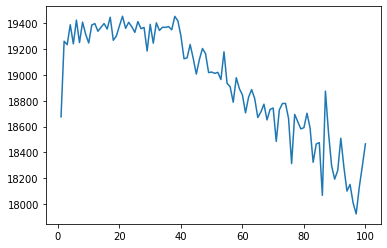

In [17]:
plt.plot(range(1,101),history.history['mean_absolute_error'])